In [2]:
# remove 0 and null values

In [3]:
# Let's do an EDA to

# 0. Reading our data

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'imakash3011/customer-personality-analysis' --force
! unzip /content/customer-personality-analysis.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 43.0MB/s]
Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [5]:
# import csv
# with open("marketing_campaign.csv", "r") as f:
#   for line in f:
#     print(line)

# %unload_ext colab_ai

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv("marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', 50)  # Display all columns
plt.style.use("ggplot")

# pd.set_option('display.width', 1000)  # Set width for better readability
# pd.set_option('display.expand_frame_repr', False)  # Prevent the DataFrame from wrapping across multiple lines


In [7]:
#1. Data understanding
print(df.shape)
print(df.head())

(2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds

In [8]:
print(df.columns)
#I'll add a description of each column here for convenience, based on their description on the Kaggle dataset page [as well as my understanding?]

print(df.describe()) #Count number if the number of entries
#Make this look better

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.50000

In [9]:
print(df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [10]:
#2. Data Preparation

In [11]:
#When we look at df.nunique() values:
print(df.nunique())
#Columns Z_CostContact and Z_Revenue only have 1 unique value. Moreover, there values are not described on [] the Kaggle Data Card and having arbitrary meanings. We will drop both of them.

df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [12]:
#Combine columns

df["Children"] = df["Kidhome"] + df["Teenhome"]
df.drop(columns=["Kidhome", "Teenhome"], inplace=True)

df["Meat Spending"] = df["MntMeatProducts"] + df["MntFishProducts"]
df.drop(columns=['MntMeatProducts', 'MntFishProducts'], inplace=True)

df["Luxary Spending"] = df['MntWines'] + df['MntSweetProducts']
df.drop(columns=['MntWines','MntSweetProducts'], inplace=True)

df.rename(columns={"MntFruits": "Fruit Spending"}, inplace=True)
df.rename(columns={"MntGoldProds": "Gold Spending"}, inplace=True)

In [13]:
df["Total Campaigns Accepted"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]
df.rename(columns={"Response": "AcceptedCmp6"}, inplace=True)

In [14]:
print(df["Total Campaigns Accepted"].value_counts())

Total Campaigns Accepted
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64


In [15]:
# #Dropping this category because NumWebPurchases gives enough relevence ?
# df.drop(column=["NumWebVisitsMonth"], inplace=True)

In [16]:
print(df)
#Make the col names more consistent later

         ID  Year_Birth   Education Marital_Status   Income Dt_Customer  \
0      5524        1957  Graduation         Single  58138.0  04-09-2012   
1      2174        1954  Graduation         Single  46344.0  08-03-2014   
2      4141        1965  Graduation       Together  71613.0  21-08-2013   
3      6182        1984  Graduation       Together  26646.0  10-02-2014   
4      5324        1981         PhD        Married  58293.0  19-01-2014   
...     ...         ...         ...            ...      ...         ...   
2235  10870        1967  Graduation        Married  61223.0  13-06-2013   
2236   4001        1946         PhD       Together  64014.0  10-06-2014   
2237   7270        1981  Graduation       Divorced  56981.0  25-01-2014   
2238   8235        1956      Master       Together  69245.0  24-01-2014   
2239   9405        1954         PhD        Married  52869.0  15-10-2012   

      Recency  Fruit Spending  Gold Spending  NumDealsPurchases  \
0          58              88   

In [17]:
# print(df.dtypes)
# print((df["Education"].iloc[1]).upper())
#Should be fine for now

In [18]:
df = df[(df["Income"] != 0) & (df["NumDealsPurchases"] != 0) | (df["NumWebPurchases"] != 0) | (df["NumCatalogPurchases"] != 0) | (df["NumStorePurchases"] != 0)]

In [19]:
print(df.shape)

(2236, 25)


In [20]:
#Dealing with Null values
print(df.isnull().sum())

ID                           0
Year_Birth                   0
Education                    0
Marital_Status               0
Income                      24
Dt_Customer                  0
Recency                      0
Fruit Spending               0
Gold Spending                0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
AcceptedCmp6                 0
Children                     0
Meat Spending                0
Luxary Spending              0
Total Campaigns Accepted     0
dtype: int64


In [21]:
#The income column has 24 null values.
#We will drop them right now. Later, we may be able to fill them in using a predictive function or an AI model.
#Feature engineering?

df.dropna(inplace=True)

<ipython-input-21-d9fe7fb2e67b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [22]:
#Remove outliers
#Let's use the IQR method to find outliers.
#Let's first find the meaningful columns values. Afterward, if a row has enough  outlier values for each column, then remove rows that have more than an x nummber of outliers in its' columns
#To determine the value x, We will determine the number of "meaningful" value x latera

In [23]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

<ipython-input-23-b80487d1cfd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')


In [24]:
#
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Fruit Spending', 'Gold Spending',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'Children', 'Meat Spending',
       'Luxary Spending', 'Total Campaigns Accepted'],
      dtype='object')


In [25]:
print(df["Income"].quantile(0.25))

35335.5


In [26]:
# #Outliers
# #Find meaningful columns. If a row has more than x outliers in the meaningful columns, remove the row
# #For now x is 4


# categories_to_clean = ['Year_Birth', 'Income', 'Children', 'Dt_Customer',
#                        'Recency', 'Fruit Spending', 'Gold Spending', 'Meat Spending', 'Luxary Spending', 'Total Campaigns Accepted',
#                         'NumDealsPurchases', 'NumWebPurchases',  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
#                         #fix column names according to convention
# df["Number of Outliers"] = 0
# for category in categories_to_clean:
#     Q1 = df[category].quantile(0.25)
#     Q3 = df[category].quantile(0.75)
#     IQR = Q3-Q1

#     df.loc[(df[category] < Q1-1.5*IQR) | (df[category] > Q3+1.5*IQR), "Number of Outliers"] += 1
#     df.loc[(df[category] < Q1-2.5*IQR) | (df[category] > Q3+3*IQR), "Number of Outliers"] += 10 #automatic removal :D

#     #have a dictionary of outlier values. for each column. do an if statement saying that for each column if it is

#     # print(df[(df[category] < Q1-1.5*IQR) | (df[category] > Q3+1.5*IQR)].shape, category)
#     # print(Q1-1.5*IQR, Q3+1.5*IQR, category)

#     # df = df[(df[category] >= Q1-1.5*IQR) & (df[category] <= Q3+1.5*IQR)]

#     print(Q1, Q3, IQR, category)

#     print("\n")


In [27]:
# print(df.shape)


In [28]:
# df = df[df["Number of Outliers"] < 4].copy()
# df.drop(columns=["Number of Outliers"], inplace=True)

In [29]:
df["Dt_Customer"] = df["Dt_Customer"].astype(int)

In [30]:
#Mahalanobis Distance

from scipy.spatial.distance import mahalanobis

def mahalanobis_distances(df):
  numeric_df = df.select_dtypes(include=[np.number])
  mean_vector = numeric_df.mean(axis=0)
  covariance_matrix = np.cov(numeric_df, rowvar=False)
  inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

  distances = numeric_df.apply(lambda row: mahalanobis(row, mean_vector, inverse_covariance_matrix), axis=1)
  return distances


In [31]:
distances = (mahalanobis_distances(df))
threshold = np.percentile(distances, 95)
df["Distances"] = distances

#For each row, if it's distance is lower than or equal to the 95th
#percentile of all mahalanobis distances of the df, keep it
#Around 100~ outliers removed
df = df[df["Distances"] <= threshold].reset_index(drop=True)

In [32]:
print(df.duplicated().sum())
#No duplicates
df.reset_index(drop=True, inplace=True)

0


Text(0, 0.5, 'Income')

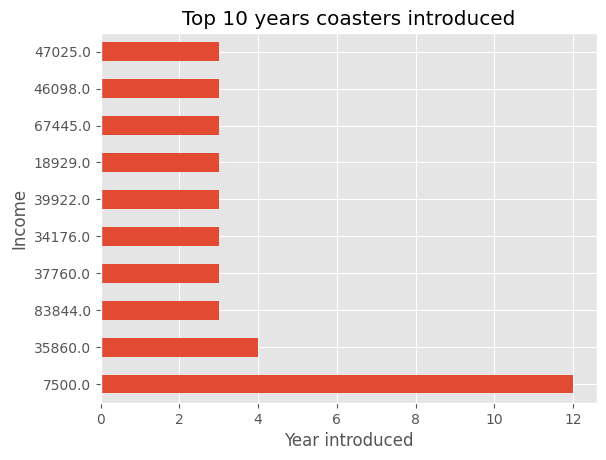

In [33]:
#3. Feature Understanding
#Univariate analysis

ax = df["Income"].value_counts().head(10).plot(kind="barh", title = "Top 10 years coasters introduced")
ax.set_xlabel("Year introduced")
ax.set_ylabel("Income")
#This doesn't work well because value_counts has WAY too many values. let's try something that can encompass all 1961 unique values of income hahahahaha



In [34]:
print(df["Income"].max())
#Ok outliers like this need to be removed.

98777.0


Text(0.5, 28.0, 'Year introduced')

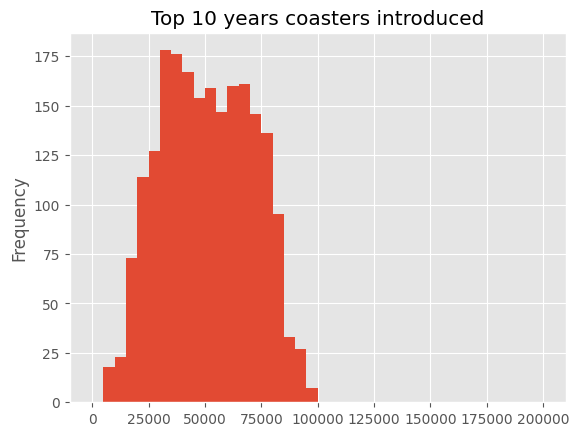

In [35]:
df["Income"].plot(kind="hist", title = "Top 10 years coasters introduced", bins = 40, range=(0, 200000))
ax.set_xlabel("Year introduced")


In [36]:
print(df["Income"].max())

98777.0


In [37]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Fruit Spending', 'Gold Spending',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'Children', 'Meat Spending',
       'Luxary Spending', 'Total Campaigns Accepted', 'Distances'],
      dtype='object')


Text(0.5, 28.0, 'Year introduced')

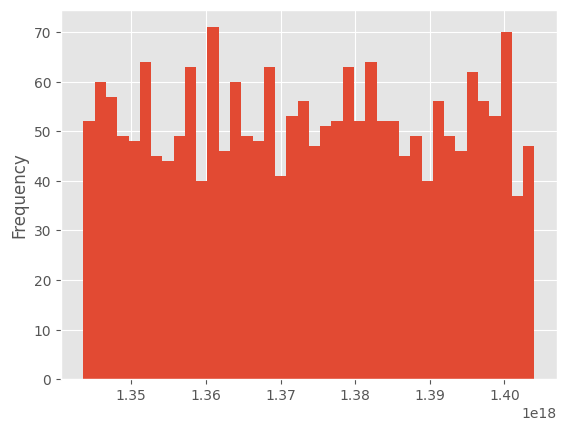

In [38]:
df["Dt_Customer"].plot(kind="hist", bins = 40)
ax.set_xlabel("Year introduced")


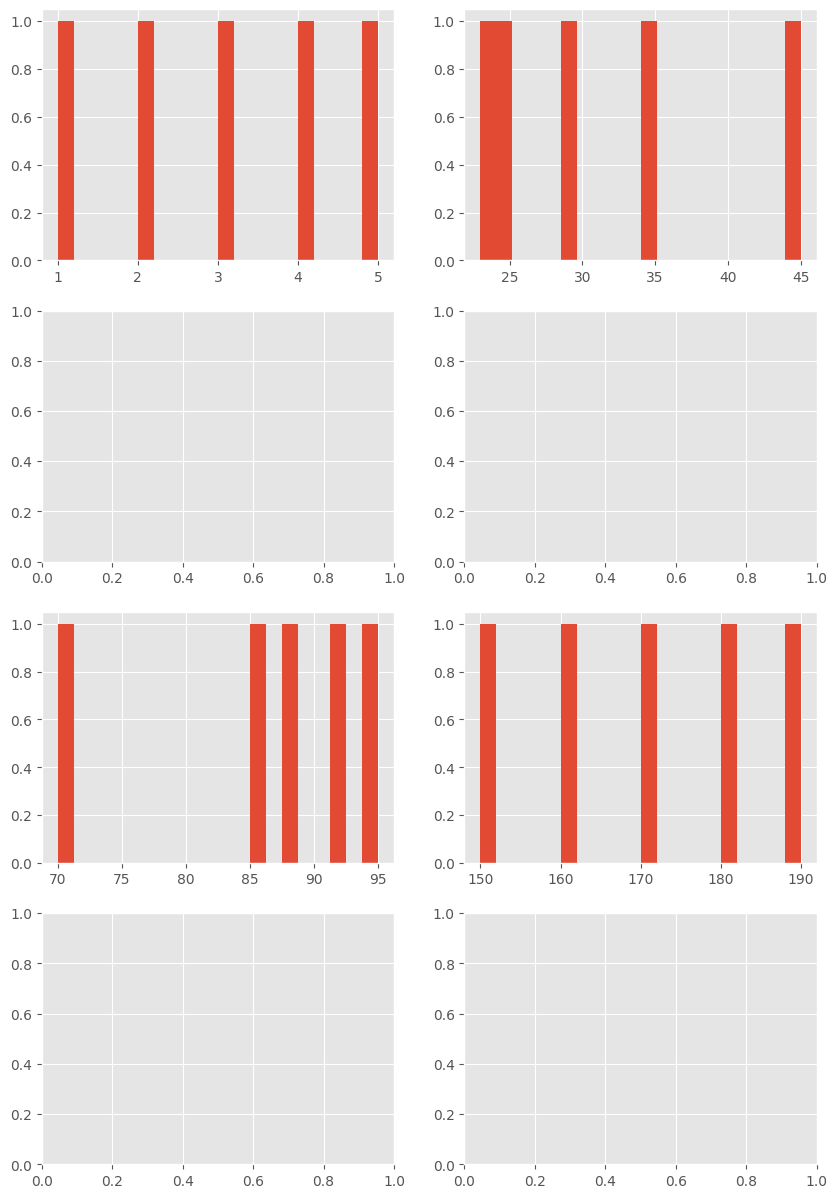

In [53]:
# numeric_df = df.select_dtypes(include=[np.number])

# for col1, col2 in zip(numeric_df.columns[::2], numeric_df.columns[1::2]):
#   df[[col1, col2]].plot(kind="hist", bins = 20, figsize = (3, 3))
#   plt.show()

numeric_df = df.select_dtypes(include=[np.number])

column_number = 0
figure, axis = plt.subplots(len(numeric_df.columns), 2, figsize=(10, 15))

while column_number < len(numeric_df.columns):
    axis[column_number, 0].hist(df[df.columns[column_number]], bins = 20)
    if(column_number + 1 < len(numeric_df.columns)):
      axis[column_number, 1].hist(df[df.columns[column_number+1]], bins = 20)
      column_number += 1

    column_number += 1

plt.show()

# for i in range(0, len(numeric_df.columns)/2):
#   for y in range(2):
#     axis[i, 0].hist(df[df.columns[i]], bins = 20)
#     axis[i, 1].hist(df[df.columns[i+1]], bins = 20)
#     plt.show()


Text(0.5, 28.0, 'Year introduced')

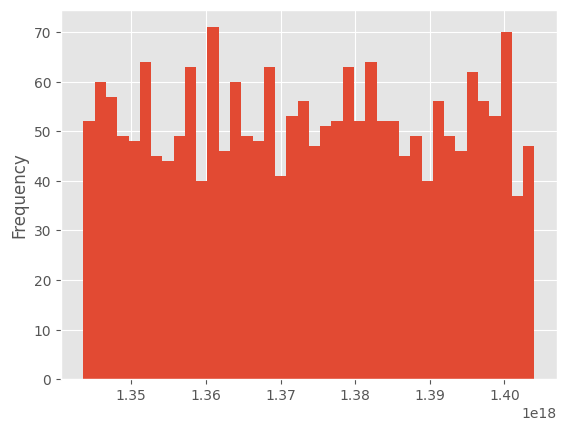

In [40]:
df["Dt_Customer"].plot(kind="hist", bins = 40)
ax.set_xlabel("Year introduced")


In [41]:
# df_filtered = df[(df["AcceptedCmp1"] == 1) | (df["AcceptedCmp2"] == 1) | (df["AcceptedCmp3"] == 1) | (df["AcceptedCmp4"] == 1) | (df["AcceptedCmp5"] == 1) | (df["Response"] == 1)]

# for category in categories_to_clean:
#   t = df_filtered[category].value_counts(normalize=True)
#   plt.scatter(t.index, t.values)
#   plt.title(category)
#   plt.show()

#   t = df[category].value_counts(normalize=True)
#   plt.scatter(t.index, t.values)
#   plt.title(category)
#   plt.show()
#   # print(df_filtered[category].value_counts(normalize=True).head(3))

# # modes = []
# # for category in categories_to_clean:
# #     mode = df_filtered[category].mode()[0]
# #     if(isinstance(mode, pd.Timestamp)):
# #       mode = int(mode.timestamp() - datetime.datetime(2000, 1, 1).timestamp())
# #     modes.append(int(mode))

# # i = 1
# # for mode in modes:
# #   print(mode, categories_to_clean[i-1])
# #   i += 1

# # plt.pie(modes, labels=categories_to_clean, autopct='%1.1f%%')
# # plt.show()

In [42]:
#Step 5: Asking questions about our data
# I want to find out:
# a) find out which customers are most likely to spend more money on certain products, in order to gain insights on our customers

#and also know
# b) which customers are more likely to buy our products, and
# c) which customers are most receptive to our marketing campaign
# In order to better understand our top customer demographics and how they correlate to our marketing campaign receptiveness

In [43]:
print(df.duplicated().sum())

0
